In [23]:
!pip install sklearn
!pip install mlxtend
!pip install imblearn
!pip install xgboost
!pip install termcolor

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2951 sha256=c12c3c9dee8f2f2b9d99f6d9de71e2cf8281a3b4e86c596abddbf7bcdb4b2905
  Stored in directory: c:\users\tanima\appdata\local\pip\cache\wheels\e2\4f\96\3b01e8981cb6f333764a2443a1f4777896180da6e46efe95c1
Successfully built sklearn


In [46]:
#importing the dependencies
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from termcolor import colored as cl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
plt.figure(figsize=(6,3))
plt.gray()
plt.rcParams['axes.grid']=True
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,LabelBinarizer, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_learning_curves
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

<Figure size 600x300 with 0 Axes>

In [47]:
#loading the dataset to a Pandas DataFrame
df= pd.read_csv('creditcard.csv')


In [48]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [49]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [50]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
df.shape

(284807, 31)

In [52]:
#distribution of Fradulent Transaction and Normal Transaction
#0->Normal Transaction, 1-> Fradulent Transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [53]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [54]:
#Checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
Total_transactions= len(df)
normal = len(df[df.Class==0])
fradulent = len(df[df.Class==1])
fraud_percentage = round(fradulent/normal*100,2)

print(cl('Total no. of Transactions are {}'.format(Total_transactions),attrs = ['bold']))
print(cl('No. of Normal Transactions are {}'.format(normal),attrs=['bold']))
print(cl('No. of Fradulent Transactions are {}'.format(fradulent),attrs=['bold']))
print(cl('Percentage of Fraud Transactions is {}'.format(fraud_percentage),attrs=['bold']))


Total no. of Transactions are 284807
No. of Normal Transactions are 284315
No. of Fradulent Transactions are 492
Percentage of Fraud Transactions is 0.17


In [58]:
def countplot_data(data,feature):
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature,data=data)
    plt.show()
    
def pairplot_data_grid(data, feature1,feature2,target):
    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter,feature1,feature2).add_legend()
    plt.show()

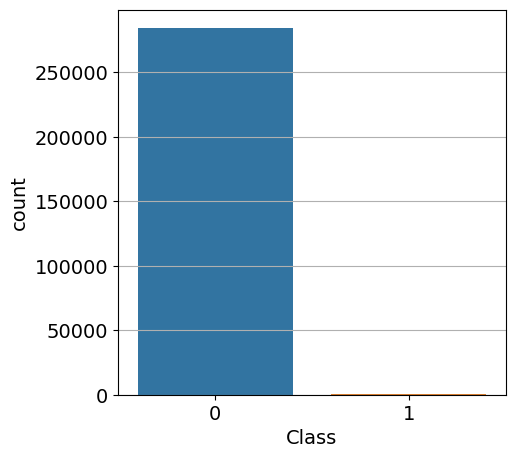

In [59]:
countplot_data(df,df.Class)

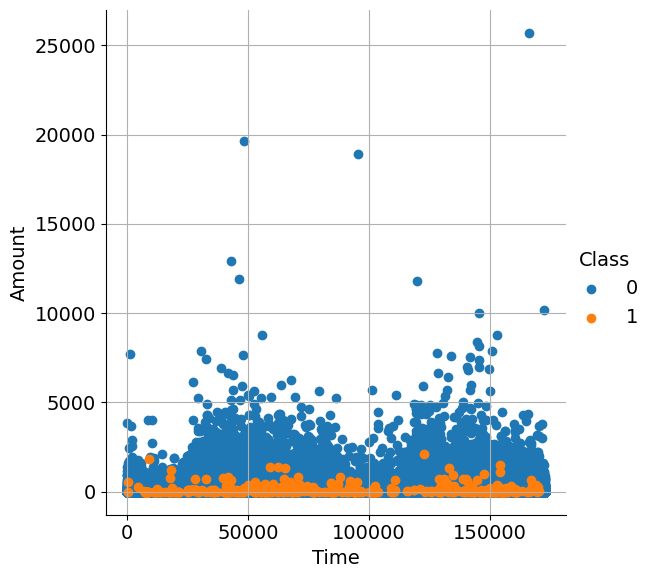

In [63]:
pairplot_data_grid(df, "Time", "Amount", "Class")

# # Here we observed that the dataset is highly unbalanced.

In [64]:
# Separating the data for analysis
normal=df[df.Class==0]
fradulent=df[df.Class==1]

In [65]:
# Statistical measures of the data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [66]:
fradulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [67]:
#compare the values for both the transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling
# Build a sample dataset containing similar distribution of normal transactions and frodulent transactions 

In [68]:
normal_sample= normal.sample(n=492)

In [74]:
#Concatenating two DataFrames rowwise
new_df= pd.concat([normal_sample,fradulent],axis=0)

In [75]:
new_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78703,57656.0,0.900902,-1.288551,1.701565,1.164949,-1.992531,0.720957,-1.297894,0.399611,0.354725,...,-0.356770,-0.410145,-0.083431,0.520465,0.317206,-0.319103,0.098508,0.055646,138.00,0
9605,14434.0,1.160344,-0.132336,0.852825,0.163276,-0.626629,-0.048178,-0.649768,0.110727,1.544970,...,0.007146,0.256161,0.007420,0.034575,0.088504,1.044684,-0.079914,-0.008707,15.95,0
61720,49953.0,1.251316,0.289774,0.663224,1.000835,-0.308734,-0.353339,-0.157668,-0.124339,0.152079,...,0.112385,0.459597,-0.157131,-0.074470,0.647039,-0.269256,0.052927,0.028394,1.18,0
39298,39777.0,-2.009485,-1.946665,1.116959,-2.134102,-1.113424,-0.687275,-0.854937,0.617364,-2.386114,...,0.315558,0.383476,0.251480,-0.047778,0.148196,-0.205264,0.183873,-0.087693,210.00,0
184216,126147.0,-0.428621,1.002870,0.264643,-0.889315,1.028007,-0.694905,1.102249,-0.241650,-0.196811,...,-0.263714,-0.581640,-0.129237,-0.691477,-0.428632,0.167470,0.229059,0.215284,2.99,0
218768,141452.0,0.027965,1.050715,-0.972674,-0.735826,1.360112,-1.779931,1.915047,-0.770688,-0.066055,...,0.163869,0.790801,-0.304403,0.001166,-0.464959,0.042318,-0.098679,0.009516,20.00,0
33364,37202.0,1.155216,-0.173557,1.037795,0.397896,-0.845641,-0.046457,-0.667199,0.158628,0.328788,...,0.113211,0.298019,-0.042471,0.058002,0.181769,0.456060,-0.005405,0.018354,25.50,0
122829,76703.0,1.212061,-0.366070,1.059187,-0.035950,-1.002583,0.047175,-0.811711,0.213515,0.856225,...,-0.092749,-0.091206,0.014558,0.091391,0.128617,0.993584,-0.036948,0.001613,1.00,0
95214,65209.0,-2.197642,0.028152,-0.686174,-0.007838,-1.589986,-0.006840,1.719465,0.576332,-0.325559,...,0.109348,0.354141,0.672065,0.115992,-0.300425,0.335184,0.281718,-0.292355,382.26,0
39409,39823.0,-0.869274,-0.771063,0.026877,-3.348951,2.740594,2.616535,-0.576446,0.917249,-1.247302,...,0.030989,-0.525922,0.147766,0.947415,-0.194424,-0.847563,0.069696,0.150146,24.00,0


In [76]:
new_df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
275992,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [77]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [78]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93852.514228,0.020139,0.088130,-0.097125,0.018213,-0.028224,0.068826,-0.015169,0.066132,0.006768,...,-0.024449,-0.002142,-0.037701,-0.009490,0.020339,0.002813,0.000645,-0.027827,-0.025515,81.354797
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the data into features and target

In [79]:
X= new_df.drop(columns='Class', axis=1)#features
Y= new_df['Class']#target variable

In [80]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
78703    57656.0  0.900902 -1.288551  1.701565  1.164949 -1.992531  0.720957   
9605     14434.0  1.160344 -0.132336  0.852825  0.163276 -0.626629 -0.048178   
61720    49953.0  1.251316  0.289774  0.663224  1.000835 -0.308734 -0.353339   
39298    39777.0 -2.009485 -1.946665  1.116959 -2.134102 -1.113424 -0.687275   
184216  126147.0 -0.428621  1.002870  0.264643 -0.889315  1.028007 -0.694905   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [81]:
print(Y)

78703     0
9605      0
61720     0
39298     0
184216    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [90]:
# Split the data into Training data and Testing data in the ratio (80:20)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=1,stratify=Y)

In [91]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

1.Logistic Regression

In [92]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_yhat = lr.predict(X_test)

In [93]:
print('Accuracy score of the Logistic Regression model is{}'.format(accuracy_score(Y_test,lr_yhat)))

Accuracy score of the Logistic Regression model is0.9238578680203046


In [94]:
print('F1 score of the Logistic Regression model is{}'.format(f1_score(Y_test,lr_yhat)))

F1 score of the Logistic Regression model is0.9222797927461138


In [99]:
print(classification_report(Y_test,lr_yhat))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        98
           1       0.95      0.90      0.92        99

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



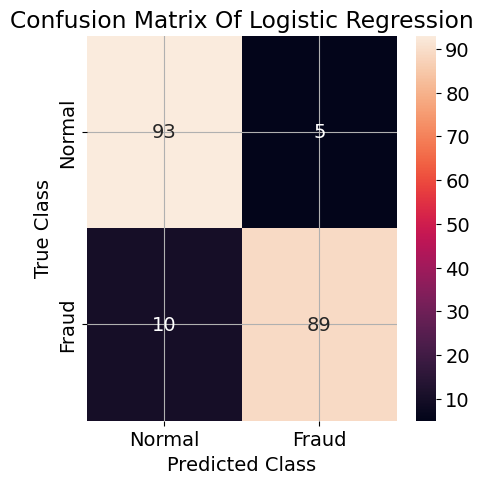

In [126]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, lr_yhat)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d");

plt.title("Confusion Matrix Of Logistic Regression")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

2.Decision Tree

In [100]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train,Y_train)
DT_yhat = DT.predict(X_test)

In [101]:
print('Accuracy score of the Decision tree model is{}'.format(accuracy_score(Y_test,DT_yhat)))

Accuracy score of the Decision tree model is0.9035532994923858


In [102]:
print('F1 score of the Decision Tree model is{}'.format(f1_score(Y_test,DT_yhat)))

F1 score of the Decision Tree model is0.9015544041450778


In [103]:
print(classification_report(Y_test,DT_yhat))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        98
           1       0.93      0.88      0.90        99

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



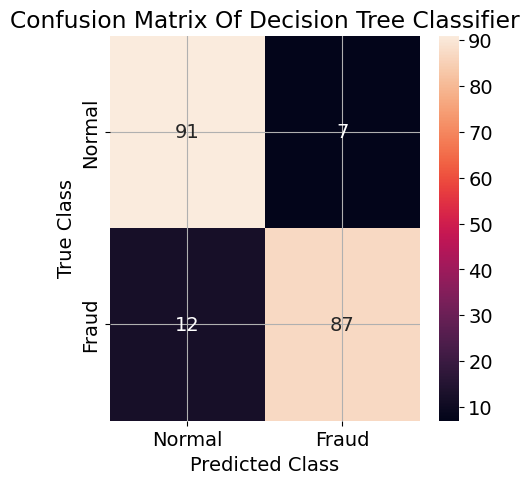

In [127]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, DT_yhat)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d");

plt.title("Confusion Matrix Of Decision Tree Classifier")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

3.Random Forest Classifier

In [104]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train,Y_train)
rf_yhat = rf.predict(X_test)

In [105]:
print('Accuracy score of the Random Forest Classifier model is{}'.format(accuracy_score(Y_test,rf_yhat)))

Accuracy score of the Random Forest Classifier model is0.9035532994923858


In [106]:
print('F1 score of the Random Forest Classifier model is{}'.format(f1_score(Y_test,rf_yhat)))

F1 score of the Random Forest Classifier model is0.8961748633879781


In [107]:
print(classification_report(Y_test,rf_yhat))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        98
           1       0.98      0.83      0.90        99

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



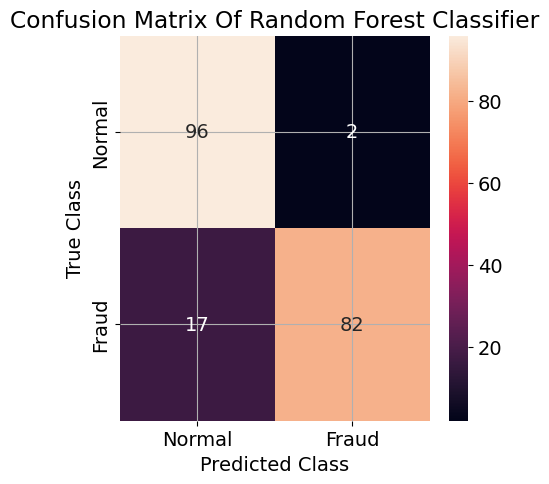

In [128]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, rf_yhat)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d");

plt.title("Confusion Matrix Of Random Forest Classifier")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

4. Support Vector Machine

In [108]:
svm = SVC()
svm.fit(X_train,Y_train)
svm_yhat = svm.predict(X_test)

In [109]:
print('Accuracy score of the Support Vector Machine model is{}'.format(accuracy_score(Y_test,svm_yhat)))

Accuracy score of the Support Vector Machine model is0.5177664974619289


In [110]:
print('F1 score of the Support Vector Machine model is{}'.format(f1_score(Y_test,svm_yhat)))

F1 score of the Support Vector Machine model is0.5581395348837209


In [111]:
print(classification_report(Y_test,svm_yhat))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47        98
           1       0.52      0.61      0.56        99

    accuracy                           0.52       197
   macro avg       0.52      0.52      0.51       197
weighted avg       0.52      0.52      0.51       197



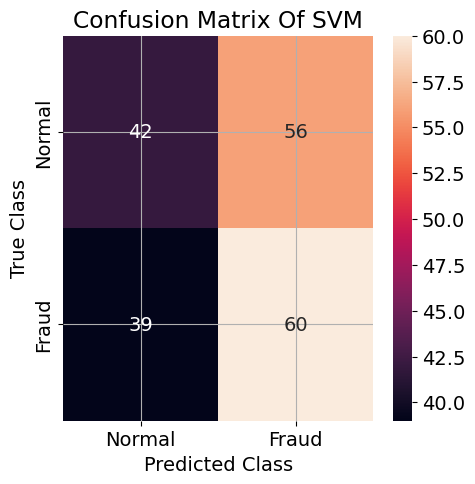

In [129]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, svm_yhat)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d");

plt.title("Confusion Matrix Of SVM")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

5. K-Nearest Neighbors 

In [112]:
n=7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, Y_train)
knn_yhat = KNN.predict(X_test)

In [113]:
print('Accuracy score of the K-Nearest Neighbors model is{}'.format(accuracy_score(Y_test,knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is0.6395939086294417


In [114]:
print('F1 score of the K-Nearest Neighbors model is{}'.format(f1_score(Y_test,knn_yhat)))

F1 score of the K-Nearest Neighbors model is0.6282722513089004


In [115]:
print(classification_report(Y_test,knn_yhat))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        98
           1       0.65      0.61      0.63        99

    accuracy                           0.64       197
   macro avg       0.64      0.64      0.64       197
weighted avg       0.64      0.64      0.64       197



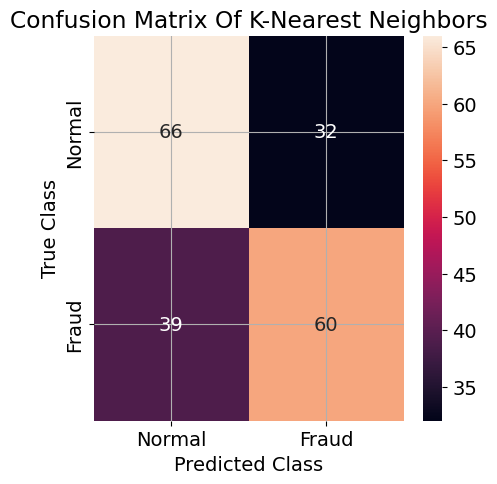

In [130]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, knn_yhat)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d");

plt.title("Confusion Matrix Of K-Nearest Neighbors")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

6. XGBoost

In [116]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, Y_train)
xgb_yhat = xgb.predict(X_test)

In [117]:
print('Accuracy score of the XGBoost model is{}'.format(accuracy_score(Y_test,xgb_yhat)))

Accuracy score of the XGBoost model is0.9187817258883249


In [118]:
print('F1 score of the K-Nearest Neighbors model is{}'.format(f1_score(Y_test,xgb_yhat)))

F1 score of the K-Nearest Neighbors model is0.9166666666666667


In [119]:
print(classification_report(Y_test,xgb_yhat))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.95      0.89      0.92        99

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



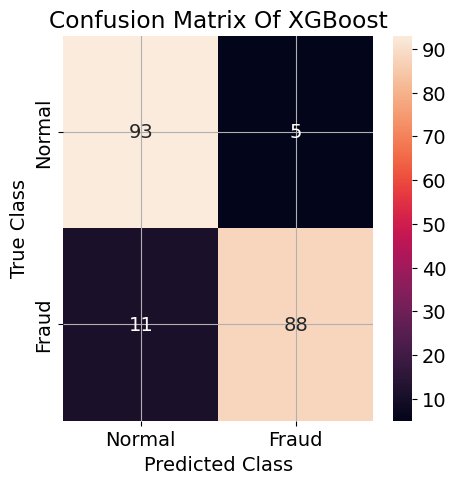

In [131]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, xgb_yhat)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d");

plt.title("Confusion Matrix Of XGBoost")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()